# MIE1624 Introduction to Data Science and Analytics

## Assignment#2 Sentiment Analysis

## Sai Anirudh Basamsetty - 1006042747

In [1]:
#!pip install --upgrade pip
#!pip3 install pandas numpy 
#!pip3 install 
#!pip3 install HTMLParser 
#!pip3 install nltk 
#!pip3 install wordcloud
#!pip install --upgrade gensim
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import unicodedata
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
#from autocorrect import spell
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import sys
print(sys.version) # showing current python version

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 1000)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anirudh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/anirudh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anirudh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]


In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# 1. Data cleaning (20 marks):

The tweets, as given, are not in a form amenable to analysis -- there is too much ‘noise’. Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below.  
o All html tags and attributes (i.e., /<[^>]+>/) are removed.  
o Html character codes (i.e., &...;) are replaced with an ASCII equivalent.  
o All URLs are removed.  
o All characters in the text are in lowercase.  
o All stop words are removed. Be clear in what you consider as a stop word.  
o If a tweet is empty after pre-processing, it should be preserved as such.  

### 1.1 Reading Files:

Reading in the Sentiment.csv file and Canadian_elections_2019.csv file.

In [4]:
generic_sentiment = pd.read_csv('./sentiment_analysis.csv')
generic_sentiment.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate...,1
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for ...,1
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making ...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorabl...",1


In [7]:
canadian_elections = pd.read_csv('US_Elections_2020.csv')
canadian_elections.head(10)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN
5,accelerating. &amp; rising when all #Americans...,0,discrimination
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination
7,b'#COVID19 #coronavirus #coronavirusuk #COVID ...,1,NaN
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption
9,"b""RT @JoeBarri: Anyone who's concerned in the ...",0,covid19


In [9]:
# Loading provided stop_words.txt file
stop = pd.read_table("stop_words.txt", names = ['stopwords'])
stop.head()
print(stop.shape)

(665, 1)


### 1.2 Remove HTML Tags and Attributes and Replace HTML Character Codes with An ASCII Equivalent:

When reading CSV files, the HTML tags, attributes and character codes are also read in. These symbols are noise to the model since they are not part of the natural language.  

Beautiful Soup is a Python library for pulling data out of HTML and XML files which can help us remove the HTML tags and attributes and convert the HTML character codes into ASCII automatically.

We define a function called html_parse that takes a line of text and returns it after applying HTML parser to it.

In [10]:
def html_parse(text):
    """
    remove html tags and attributes using beautifulSoup html.parser
    returns output as text
    """
    beautifulsoup=BeautifulSoup(text,'lxml')
    return beautifulsoup.get_text()

In [11]:
generic_sentiment['text']=generic_sentiment['text'].apply(str)

In [12]:
#Apply function html_parse to every row of the test column in Sentiment
generic_sentiment['cleaned']=generic_sentiment['text'].apply(html_parse)
generic_sentiment.head(10)

,ID,text,label,cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate...,1,RT @SH4WNSMILE: -Who is excited for illuminate...
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for ...,1,RT @KendallHuntRPD: The #firstdayofschool for ...
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making ...,1,RT @BantySrkian: #SRK and kajol in the making ...
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1,RT @GayHopper_com: I'm happy! https://t.co/fKX...
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorabl...",1,"RT @StarCinema: Kathryn, Daniel share memorabl..."


In [13]:
canadian_elections['cleaned']=canadian_elections['text'].apply(html_parse)
canadian_elections.head(10)

/home/anirudh/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "https://t.co/f4Y1bHLD8f'" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


,text,sentiment,negative_reason,cleaned
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"b'@robreiner so afraid of Nov, Dec, and Jan! E..."
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"b""RT @SueC00K: Lord Sumption launches Recovery..."
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,b'RT @WalidPhares: Uber Timing: after #Biden a...
3,b'Every 107 seconds an American is dying from ...,1,NaN,b'Every 107 seconds an American is dying from ...
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,b'RT @thewebbix: The #Democrats embrace #Diver...
5,accelerating. &amp; rising when all #Americans...,0,discrimination,accelerating. & rising when all #Americans kil...
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination,b'@realDonaldTrump 961 dead Americans in one d...
7,b'#COVID19 #coronavirus #coronavirusuk #COVID ...,1,NaN,b'#COVID19 #coronavirus #coronavirusuk #COVID ...
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption,b'@charliekirk11 only reason @realdonaldtrump ...
9,"b""RT @JoeBarri: Anyone who's concerned in the ...",0,covid19,"b""RT @JoeBarri: Anyone who's concerned in the ..."


### 1.2 Unicode Character with Regular Text

Some tweets might contain unicode equivalent characters, and these character would also add noise to the model. To remove them, unicodedata.normalize function is used to normalize unicode characters into regular alphabet.

In [14]:
def normalize(text):
    """
    normalizes unicode character to regular text
    """
    # read ascii characters using NFKD method, then decode back to string
    text=unicodedata.normalize('NFKD',text).encode('ascii', 'ignore').decode('utf-8')
    return text

In [15]:
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(normalize)
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(normalize)

### 1.3 Remove URL

URL within the tweets can not be processed by our model because it is not natural language.  

We use <a href="https://docs.python.org/3/library/re.html">Regular expression operations</a> to remove URL. The re.sub method searches within the string for anything that begins with http or www until a whitespace is seen, and replace all matches with ''.

In [16]:
def remove_url(text):
    """
    removes URL within a string by matching a pattern
    pattern: http, www or https until 1st white space seen
    """
    p_1 = '\w+\.\S+'
    p_2 = r'https\S+' 
    p_3 = r'www\S+'
    p_4 = r'^https?:\/\/.*[\r\n]*'
    
    try:
        text = re.sub(p_1, '', text) 
        text = re.sub(p_2, '', text)
        text = re.sub(p_3, '', text)
        text = re.sub(p_4, '', text)
    except:
        text = text
    return(text)

In [17]:
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(remove_url)
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(remove_url)

### 1.4 Remove Non Letter and White Spaces

We also use re.sub to <a href="https://stackoverflow.com/questions/22520932/python-remove-all-non-alphabet-chars-from-string">remove non letter and white spaces.</a> All letter that is not in the a-z, A-Z, and white space set, were removed and replaced them with a white space.

In [18]:
def remove_nonletter(text):
    """
    matching anything that is not in the a-z, A-Z and white space set, replace with white space
    """
    regex = re.compile('[^a-zA-Z]')
    text=regex.sub(' ', text)
  
    return text

Then all texts are cleaned by changing all characters into lowercase and deleting extra white space

In [19]:
generic_sentiment['cleaned']=generic_sentiment['text'].apply(remove_nonletter)
canadian_elections['cleaned']=canadian_elections['text'].apply(remove_nonletter)

In [20]:
def remove_lc_ws(text):
    """
    Removing extra whitespace and change all characters into lowercase
    """
    try:
        text=re.sub(r'\s+', ' ', text) 
        text=text.lower()
    except:
        text=text
    return text

In [21]:
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(remove_lc_ws)
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(remove_lc_ws)

### 1.5 Remove Stop words

Using stop word list from the natual language tool kit (ntlk) and provided stop_word file to remove stop words from tweets.

In [22]:
# getting ntlk stop word list into dataframe
stop_words_ntlk=pd.DataFrame(data=list(stopwords.words('english')), columns=['word'])
stop_words_combined=stop_words_ntlk

In [23]:
#removing stop words for Sentiment
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(lambda x : x.split())
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(lambda y : [word for word in y if word not in stop_words_combined.values])
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(lambda y : [word for word in y if word not in stop])
generic_sentiment.head()


,ID,text,label,cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[josh, jenkins, looking, forward, tab, breeder..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[rt, mianusmanjaved, congratulations, pakistan..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[rt, pepalerts, september, yesmag, taking, mai..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[rt, david, gaibis, newly, painted, walls, tha..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[rt, cedricfeschotte, excited, announce, july,..."


In [24]:
#removing stop words for Sentiment
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(lambda x : x.split())
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(lambda y : [word for word in y if word not in stop_words_combined.values])
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(lambda y : [word for word in y if word not in stop])
canadian_elections['cleaned'].apply(lambda x : x.remove(x[0]))
canadian_elections.head()


,text,sentiment,negative_reason,cleaned
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[robreiner, afraid, nov, dec, jan, even, biden..."
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[rt, suec, k, lord, sumption, launches, recove..."
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[rt, walidphares, uber, timing, biden, advisor..."
3,b'Every 107 seconds an American is dying from ...,1,NaN,"[every, seconds, american, dying, trumpvirus, ..."
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,"[rt, thewebbix, democrats, embrace, diversitya..."


### 1.6 Stemming

The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved. The reason why we stem is to shorten the lookup, and normalize sentences.

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = PorterStemmer()

def lemmatising (text):
    """
    construct lemmatising function
    """
    x = [lemmatizer.stem(word) for word in text]
    return x

In [26]:
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(lemmatising)
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(lemmatising)

In [27]:
canadian_elections.head()

,text,sentiment,negative_reason,cleaned
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[robrein, afraid, nov, dec, jan, even, bidenha..."
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[rt, suec, k, lord, sumption, launch, recoveri..."
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[rt, walidphar, uber, time, biden, advisor, sa..."
3,b'Every 107 seconds an American is dying from ...,1,NaN,"[everi, second, american, die, trumpviru, n, n..."
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,"[rt, thewebbix, democrat, embrac, diversityand..."


In [28]:
generic_sentiment.head()

,ID,text,label,cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[josh, jenkin, look, forward, tab, breeder, cr..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[rt, mianusmanjav, congratul, pakistan, becom,..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[rt, pepalert, septemb, yesmag, take, main, me..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[rt, david, gaibi, newli, paint, wall, thank, ..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[rt, cedricfeschott, excit, announc, juli, fes..."


In [29]:
def remove_single_character(line):
    line = [i for i in line if len(i) > 1]
    return line

In [30]:
generic_sentiment['cleaned']=generic_sentiment['cleaned'].apply(remove_single_character)
canadian_elections['cleaned']=canadian_elections['cleaned'].apply(remove_single_character)

# 2. Exploratory analysis (15 marks):

1. Design a simple procedure that determines the political party (Liberal, Conservative, NDP, None) of a given tweet and apply this procedure to all the tweets in the 2019 Canadian elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties. What can you say about the distribution of the political affiliations of the tweets?  
  
  
2. Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc) that visualizes some aspect of the generic tweets from Sentiment.csv file and another figure for the 2019 Canadian election tweets. All graphs and plots should be readable and have all axes that are appropriately labelled.

### 2.1 Determine the Political Party

#### Indicators used for analysis
**Top 6 Canadian Political Parties in 2019 Canadian Federal election** 
1. **Liberal Party**
   - leader: Justin Trudeau  
   - Slogans: "Choose Forwrd"  
   - key words: justin, trudeau, justintrudeau, chooseforward, liberal,red 
2. **Conservative Party**
   - leader: Andrew Scheer
   - Slogans: "It is time for you to get ahead"
   - key words: andrew, scheer, andrewscheer, conservative ,getahead
3. **New Democratic Party**
   - leader: Jagmeet Singh
   - Slogans: "In it for you"
   - key words: jagmeet, singh, jagmeetsingh, newdemocratic, ndp, orange
4. **Bloc Quebecois**
   - leader: Yves-François Blanchet
   - Slogans:"It is us"
   - key words: yves, blanchet, blocquebecois, bloc, quebecois, bq
5. **Green Party**
   - leader: Elizabeth May
   - Slogans: "Not left.Not right. Forward together"
   - key words: elizabeth, elizabethmay, green, notleftnotrightforwardtogether
6. **People's Party**  
   - leader: Maxime Bernier
   - Slogans: "Strong and Free"
   - key words: maxime, bernier,renata,ford,renataford,maximebernier, strongandfree, ppc, peoplespartyofcanada

We defined a function called party_name which compares the frequency of different keywords for each party in a single tweet and returns the most common party name.

In [31]:
def party_name(tw_list):
    '''
    Input: a single tweet
    Output: party name 
    '''
    tw = tw_list
    # keywords of each party
    Liberal =['trudeau', "justin", "justintrudeau", "liberal","liberals","chooseforward","forward","red","trudeaumustgo"] 
    Conservative=["andrew", "scheer", "andrewscheer","conservative", "conservatives","getahead","cpc"]
    NDP=["ndp","orange","jagmeet","singh","jagmeetsingh","newdemocratic","initforyou"]
    BQ=["yvesfrancois","blanchet","yvesfrancoisblanchet","blocquebecois","bq","quebecois","bloc","itisus"]
    Green = ["green","elizabeth","elizabethmay","notleftnotrightforwardtogether"]
    PPC=["maxime", "bernier", "maximebernier", "renata","ford","renataford","strongandfree", "ppc", "peoplespartyofcanada"]
    
    party = []
        
    for key in Liberal:   
        if key in tw:
            party.append('Liberal Party')
        
    for key in Conservative:
        if key in tw:
            party.append('Conservative Party')
           
    for key in NDP:
        if key in tw:
            party.append('New Democratic Party')
            
    for key in BQ:
        if key in tw:
            party.append('Bloc Quebecois')
            
    for key in Green:
        if key in tw:
            party.append('Green Party')
            
    for key in PPC:
        if key in tw:
            party.append("People's Party")
            
    # choose the most common party name for this tweet
    if len(party) > 1:
        most_common = max(set(party), key=party.count)
        party = []
        party.append(most_common)
    elif len(party) == 0:
        party.append('Other')
        
    return party

In [32]:
# put each tweet in to corresponding party list
canadian_elections['party']='Other'
canadianelections_liberal_tweet = []
canadianelections_conservative_tweet = []
canadianelections_ndp_tweet = []
canadianelections_bq_tweet=[]
canadianelections_green_tweet=[]
canadianelections_ppc_tweet=[]

for i in range(len(canadian_elections)):   
    party_determinant= party_name(canadian_elections.cleaned[i])[0]
    canadian_elections["party"][i]=party_determinant
    if party_determinant == 'Liberal Party':
        canadianelections_liberal_tweet.append(canadian_elections.cleaned[i])
    elif party_determinant == 'Conservative Party':
        canadianelections_conservative_tweet.append(canadian_elections.cleaned[i])
    elif party_determinant == 'New Democratic Party':
        canadianelections_ndp_tweet.append(canadian_elections.cleaned[i])
    elif party_determinant == 'Bloc Quebecois':
        canadianelections_bq_tweet.append(canadian_elections.cleaned[i])
    elif party_determinant == 'Green Party':
        canadianelections_green_tweet.append(canadian_elections.cleaned[i])
    elif party_determinant == "People's Party":
        canadianelections_ppc_tweet.append(canadian_elections.cleaned[i])   

<ipython-input-32-3e6350d27118>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canadian_elections["party"][i]=party_determinant


**Plot the distribution of the political affiliations of the tweets**

ValueError: 'explode' must be of length 'x'

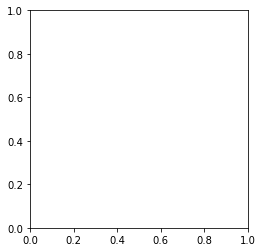

In [33]:
labels = list(canadian_elections['party'].value_counts().keys())
sizes = list(canadian_elections['party'].value_counts().values)
explode = (0, 0, 0, 0, 0, 0.5, 1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Distribution of The Political Affiliations of The Tweets', fontsize=16)
plt.show()

From the distribution, we can see that the majority of tweets are labeled as "Other" since they don't contain keyword in the list. Besides, the percentage of lieral party and conservative party are similar because they are main competitive parties in 2019 Canadian Federal election.


### 2.2 Visualization of Data

**Graphical figure that visualizes the generic tweets from Sentiment.csv file**

We print the world cloud for generic tweets from Sentiment.csv file

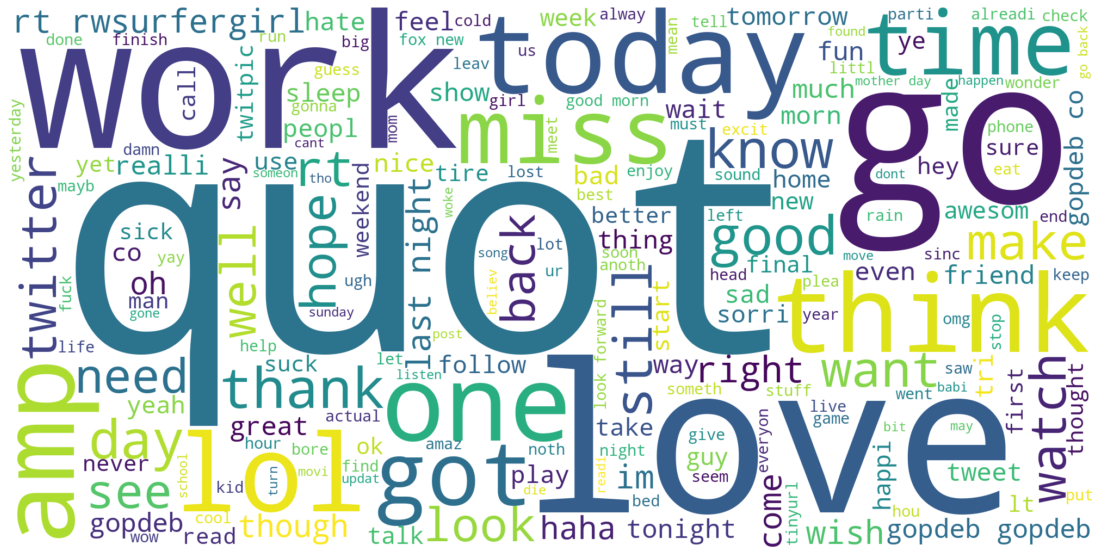

In [230]:
worldcloud_text=generic_sentiment.cleaned.apply(lambda x:" ".join(x))
worldcloud_text=" ".join(worldcloud_text)
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 2000, height = 1000,max_words=200,background_color="white").generate(worldcloud_text)
# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Graphical figure that visualizes the 2019 Canadian election tweets**

In [231]:
canadian_elections.head()

,sentiment,negative_reason,text,cleaned,party
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[rosiebarton, instead, suggest, agr, canadian,...",Other
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[allwomanspacewalk, real, space, station, etob...",Other
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[brantford, go, cost, billion, next, year, ask...",Liberal Party
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[canada, canadaelect, canadavot, elxn, ncan, d...",Other
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[canada, taxpay, sick, amp, tire, hard, earn, ...",Liberal Party


In [232]:
CE_sentiment_table=canadian_elections[canadian_elections.sentiment=='Negative'].groupby('party').sentiment.agg(['count'])
CE_sentiment_table.columns=['negative']
CE_sentiment_table2=canadian_elections[canadian_elections.sentiment=='Positive'].groupby('party').sentiment.agg(['count'])
CE_sentiment_table2.columns=['positive']
CE_sentiment_table=CE_sentiment_table.join(CE_sentiment_table2).fillna(0)
CE_sentiment_table['%neg']=CE_sentiment_table.apply(lambda x: round(int(x['negative'])/(int(x['positive'])+int(x['negative'])),3)*100,axis=1)
CE_sentiment_table['%pos']=CE_sentiment_table.apply(lambda x: round(int(x['positive'])/(int(x['positive'])+int(x['negative'])),3)*100,axis=1)
CE_sentiment_table['total']=CE_sentiment_table.apply(lambda x: (int(x['positive'])+int(x['negative'])),axis=1)
CE_sentiment_table=CE_sentiment_table.sort_values(by=['total'], ascending=False)
CE_sentiment_table2=None
CE_sentiment_table

,negative,positive,%neg,%pos,total
party,,,,,
Other,455,646,41.3,58.7,1101
Liberal Party,197,194,50.4,49.6,391
Conservative Party,262,126,67.5,32.5,388
New Democratic Party,31,95,24.6,75.4,126
People's Party,45,35,56.2,43.8,80
Green Party,13,28,31.7,68.3,41
Bloc Quebecois,3,3,50.0,50.0,6


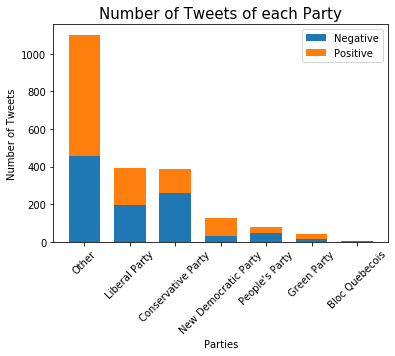

In [233]:
labels = list(CE_sentiment_table.index.values)

neg = (list(CE_sentiment_table.negative.values))
pos = (list(CE_sentiment_table.positive.values))
ind = np.arange(len(labels))   
width = 0.7     

p1 = plt.bar(ind, neg, width)
p2 = plt.bar(ind, pos, width, bottom=neg)

plt.ylabel('Number of Tweets')
plt.xlabel('Parties')
plt.title('Number of Tweets of each Party', fontsize=15)
plt.xticks(ind, labels)
plt.xticks(rotation=45)
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'))

plt.show()

The above figure demonstrates that the percentage of negative tweets is higher than the percentage of positive tweets for conservative party, people's party and Bloc Quebecois, but the situation is opposite for new democratic party and green party, and the tweets related with liberal party have a similar ratio about negative and positive setiment.

## Q2 Bonus

We also draw the pie to show ratio of each reasons in negative tweets. The following figure shows that except for 'Other' reason, the public can not tolerate scandal of party and telling lies to the public. So every party should be honest to voters.

In [272]:
CA_elections_neg=canadian_elections.loc[canadian_elections['sentiment']=='Negative']

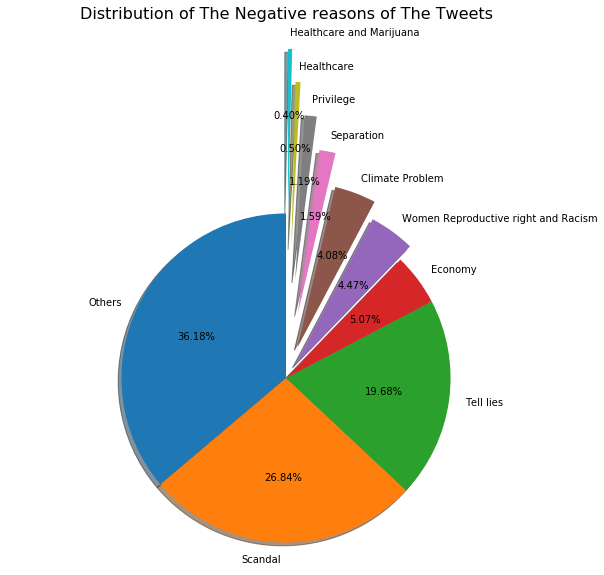

In [274]:
labels = list(CA_elections_neg['negative_reason'].value_counts().keys())
sizes = list(CA_elections_neg['negative_reason'].value_counts().values)
explode = (0,0,0,0, 0.1, 0.2, 0.4, 0.6, 0.8, 1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Distribution of The Negative reasons of The Tweets', fontsize=16)
plt.show()

# 3. Model preparation (15 marks):

Split the generic tweets from Sentiment.csv file randomly into training data (70%) and test data (30%). Prepare the data to try multiple classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)), where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, word frequency (WF) and TF-IDF.

In [302]:
sentiment_X_raw=generic_sentiment.loc[:,['cleaned']]
sentiment_X_raw.columns=['text']
sentiment_X=pd.DataFrame(sentiment_X_raw.text.apply(lambda x:" ".join(x)))

sentiment_Y = generic_sentiment.loc[:,['sentiment']]
sentiment_Y.sentiment=sentiment_Y.sentiment.apply(lambda x: 1 if x =='Positive' else 0 )


### 3.1 Create TF-IDF Feature

**TF-IDF**, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.  
Reference:<a href='https://en.wikipedia.org/wiki/Tf%E2%80%93idf'>https://en.wikipedia.org/wiki/Tf%E2%80%93idf</a>

Rather than manually implementing TF-IDF ourselves, we could use the class <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html'>TfidfVectorizer</a> provided by sklearn

In [303]:
def Tf_Idf_feature(data):
    vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
    vectors = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names()
    print(len(feature_names))
    return vectorizer,vectors
    

In [304]:
vectorizer_tfidf,tf_idf_X=Tf_Idf_feature(sentiment_X.text)

90624


### 3.2 Create word frequency (WF) Feature

Rather than manually implementing WF ourselves, we could use the class <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer'>CountVectorizer</a> provided by sklearn

In [237]:
def WF_feature(data):
    vectorizer = CountVectorizer(analyzer='word',stop_words='english')
    vectors = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names()
    print(len(feature_names))
    return vectorizer,vectors

In [238]:
vectorizer_wf,wf_X=WF_feature(sentiment_X.text)

90624


In [322]:
wf_X

<133811x90624 sparse matrix of type '<class 'numpy.int64'>'
	with 935771 stored elements in Compressed Sparse Row format>

## Q3 Bonus

### Create Word Embeddings Feature

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.<a href=https://machinelearningmastery.com/what-are-word-embeddings/>Word embedding algorithms</a> like word2vec and GloVe are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation.

In [305]:
sentiment_X_raw.head()

,text
0,"[rt, diplomtc, immnti, realdonaldtrump, tri, t..."
1,"[chiefi, damn, jealou, wanna, watch, fight, lo..."
2,"[listen, beatl, great]"
3,"[ddlovato, could, plea, get, shout, anyth, hug..."
4,"[salspizza, spot, ur, messag, toni, repli]"


In [306]:
from gensim.models import Word2Vec
def WE_feature(data):
    model = Word2Vec(data)
    print(model)
    return model

In [307]:
WE_model=WE_feature(sentiment_X_raw.text)

Word2Vec(vocab=11545, size=100, alpha=0.025)


In [338]:
words = list(WE_model.wv.vocab)

### Create N-gram Feature

n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The scikit-learn library makes this really easy to play around with. Just use the ngram_range argument with <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer'>CountVectorizer</a>

In [333]:
def Ngram_feature(data):
    #All values of n such such that min_n <= n <= max_n will be used. (1, 2) means unigrams and bigrams
    vectorizer = CountVectorizer(binary=True,ngram_range=(2, 2))
    vectors = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names()
    print(len(feature_names))
    return vectorizer,vectors

In [334]:
vectorizer_Ng,Ng_X=WF_feature(sentiment_X.text)

90624


### 3.3 Split  data into train & test dataset

In [335]:
# Split the classified tweet data randomly into training data (70%) and test data (30%). 

seed = 101
TfIdf_x_train, TfIdf_x_test, TfIdf_y_train, TfIdf_y_test = train_test_split(tf_idf_X, sentiment_Y, test_size = 0.30, random_state = seed)
WF_x_train, WF_x_test, WF_y_train, WF_y_test = train_test_split(wf_X, sentiment_Y, test_size = 0.30, random_state = seed)
Ng_x_train, Ng_x_test, Ng_y_train, Ng_y_test = train_test_split(Ng_X, sentiment_Y, test_size = 0.30, random_state = seed)



In [327]:
print(TfIdf_x_train.shape)
print(TfIdf_x_test.shape)
print(TfIdf_y_train.shape)
print(TfIdf_y_test.shape)

(93667, 90624)
(40144, 90624)
(93667, 1)
(40144, 1)


In [328]:
print(WF_x_train.shape)
print(WF_x_test.shape)
print(WF_y_train.shape)
print(WF_y_test.shape)

(93667, 90624)
(40144, 90624)
(93667, 1)
(40144, 1)


In [329]:
print(Ng_x_train.shape)
print(Ng_x_test.shape)
print(Ng_y_train.shape)
print(Ng_y_test.shape)

(93667, 90624)
(40144, 90624)
(93667, 1)
(40144, 1)


# 4. Model implementation (30 marks):

- For data from Sentiment.csv file, train models on the training data, tune the hyperparameters (if necessary, with cross-validation) and apply the model to the test data to obtain an accuracy value. Evaluate the same model with best performance on the 2019 Canadian elections data. How well do your predictions match the sentiment labelled in the 2019 Canadian elections data?  

- Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 3 parties. Compare your modeling results with election outcome. Discuss whether NLP analytics based on tweets is useful for political parties during election campaigns  

- Split the negative 2019 Canadian elections tweets into training data (70%) and test data (30%). Use the sentiment labels in the 2019 Canadian elections data instead of your predictions from the previous part. Choose three algorithms from classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)), train multi-class classification models to predict the reason for the negative tweets. There are 10 different negative reasons labelled in the dataset. Feel free to combine similar reasons into fewer categories as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.

## 4.1 Predict Sentiment

In [242]:
import warnings
warnings.filterwarnings('ignore')

In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

In [313]:
def GridSearch(X_train,Y_train,model):
    if model=='LogisticRegression':
         params=[
             {'penalty': ['l1'], 'solver': [ 'liblinear', ],'C':np.arange(0.1,3,0.1),},
             {'penalty': ['l2'], 'solver': ['newton-cg', 'sag','lbfgs','liblinear' ],'C':np.arange(0.1,3,0.1),},
         ]
         #Linear regression model
         Logre = LogisticRegression()
    elif model=='LinearSVC':
        params=[
             {'penalty': ['l2'], 'loss': ['hinge','squared_hinge'],'C':np.arange(0.1,5,0.1)},
         ]
        Logre = LinearSVC(random_state=101, tol=1e-5)
    elif model=='KNN':
        params=[
             {'weights': ['uniform','distance'],'n_neighbors':np.arange(2,10,1)},
         ]
        Logre = KNeighborsClassifier(algorithm='auto')
    elif model=='NaiveBayes':
        params=[
             {'alpha':np.arange(0,1.5,0.005)},
         ]
        Logre = MultinomialNB()
    elif model=='DecisionTree':
        params=[
             {'criterion': ['gini','entropy'],'splitter':['best', 'random'], 'max_features':['auto','log2'],'max_depth':np.arange(2,100,10)},
         ]
        Logre = tree.DecisionTreeClassifier(random_state=101)
    elif model=='RandomForest':
        params=[
            {'n_estimators':np.arange(50,400,200),'max_depth':np.arange(5,10,5)}
        ]
        Logre = RandomForestClassifier(random_state=101)
    elif model=='XGboost':
        params=[
             {'booster': ['gblinear'], 'eta':np.arange(0,1,0.5)},
            #
             {'booster': ['gbtree'], 'alpha':np.arange(0,1,0.5)},
         ]
        Logre = XGBClassifier(random_state=101,objective="binary:logistic")
    
    #grid search engine
    gridLogre = GridSearchCV(estimator = Logre, param_grid = params, scoring = 'accuracy')
    #select best logisticregression model
    best_par = gridLogre.fit(X_train, Y_train)
    #best parameter results for grid search
    print("Best hyperparameters:\n",best_par.best_params_)
    print("Best score:\n",best_par.best_score_)
    best_model = gridLogre.best_estimator_
    return best_model

def Train_Test_model(x_train, y_train,x_test,y_test,bestmodel,k,if_report=False):
    #k-folds-coss-validation
    y_pred = cross_val_predict(bestmodel, x_train, y_train, cv = k)
    # Accuracy on training dataset
    score_train_error = accuracy_score(y_train, y_pred)
    print('The accuracy of the model on train dataset is {0:.5f}%'.format(score_train_error*100))
    

    prediction =bestmodel.predict(x_test)
    CM = confusion_matrix(y_test, prediction)
    # Accuracy of prediction on testing(30%) set 
    #test accuracy
    score_valid_error = accuracy_score(y_test, prediction)
    print('The accuracy of the model on test dataset is {0:.5f}%'.format(score_valid_error*100))
    print('Test result report:\n\n', classification_report(y_test, prediction),'\n')
    #test result report
    if if_report:
        if len(set(y_test))==2:
            test_score = bestmodel.predict_proba(x_test)
            print('ROC plot and corresponding AUC:\n')
            plot_roc(y_test,test_score)
        elif len(set(y_test))>2:
            plot_confusion_matrix(CM,y_test)
    #return accuracy_score(y_test, prediction),CM

def plot_roc(true, score):
    preds = score[:,1]
    fpr, tpr, threshold = roc_curve(true, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def plot_confusion_matrix(cm,y):
    
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y), fontsize=12)
    plt.yticks(tick_marks, np.unique(y), fontsize=12)
    plt.xlabel('True Label', fontsize=15)
    plt.ylabel('Predicted Label', fontsize=15)
    bottom, top = plt.ylim() 
    plt.ylim(bottom+0.5, top-0.5)  

    for i in range(len(cm)):
        for j in range(len(cm[i])):
            color = 'black'   
            if cm[i][j] > 20:
                color = 'white'
            plt.text(j, i, format(cm[i][j]), 
                    horizontalalignment='center',
                    color=color, fontsize=15)



### 4.1.1 Logistic Regression Model

**Training TF-IDF Feature**

In [245]:
LogisticRegression_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'LogisticRegression')

Best hyperparameters:
 {'C': 0.8, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:
 0.7651574193686144


Then we will use the best paramaters to train logistic regresion model with 5-folds-coss-validation and make prediction on our testing data.

The accuracy of the model on train dataset is 76.69297%
The accuracy of the model on test dataset is 76.46722%
Test result report:

               precision    recall  f1-score   support

           0       0.78      0.79      0.79     22257
           1       0.74      0.73      0.73     17887

    accuracy                           0.76     40144
   macro avg       0.76      0.76      0.76     40144
weighted avg       0.76      0.76      0.76     40144
 

ROC plot and corresponding AUC:



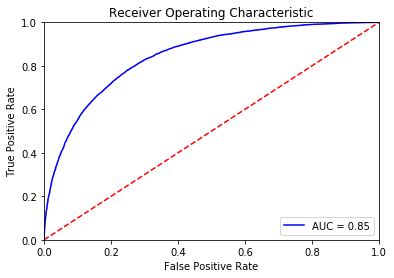

In [246]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel(),\
                 LogisticRegression_model_tfidf,5,True)

**Training WF Feature**

In [247]:
LogisticRegression_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'LogisticRegression')

Best hyperparameters:
 {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'sag'}
Best score:
 0.7626271792627073


The accuracy of the model on train dataset is 76.45169%
The accuracy of the model on test dataset is 76.43234%
Test result report:

               precision    recall  f1-score   support

           0       0.78      0.79      0.79     22257
           1       0.74      0.73      0.73     17887

    accuracy                           0.76     40144
   macro avg       0.76      0.76      0.76     40144
weighted avg       0.76      0.76      0.76     40144
 

ROC plot and corresponding AUC:



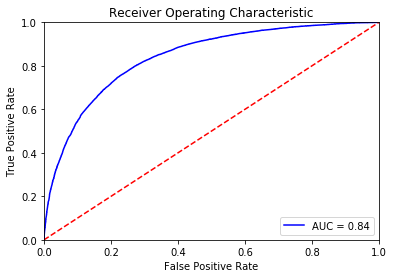

In [248]:
Train_Test_model(WF_x_train,WF_y_train.sentiment.ravel(),WF_x_test,WF_y_test.sentiment.ravel(),\
                 LogisticRegression_model_wf,5,True)


**Training N-grams Feature**

In [336]:
LogisticRegression_model_Ng=GridSearch(Ng_x_train,Ng_y_train.sentiment.ravel(),'LogisticRegression')

Best hyperparameters:
 {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:
 0.7626058270255266


The accuracy of the model on train dataset is 76.45062%
The accuracy of the model on test dataset is 76.42985%
Test result report:

               precision    recall  f1-score   support

           0       0.78      0.79      0.79     22257
           1       0.74      0.73      0.73     17887

    accuracy                           0.76     40144
   macro avg       0.76      0.76      0.76     40144
weighted avg       0.76      0.76      0.76     40144
 

ROC plot and corresponding AUC:



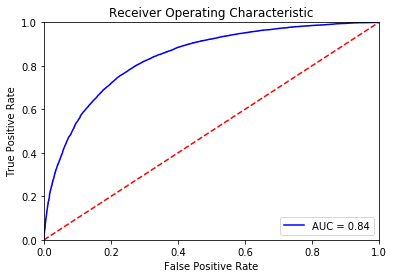

In [337]:
Train_Test_model(WF_x_train,WF_y_train.sentiment.ravel(),WF_x_test,WF_y_test.sentiment.ravel(),\
                 LogisticRegression_model_Ng,5,True)

### 4.1.2 SVM  Model 

**Training TF-IDF Feature**

In [50]:
SVM_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'LinearSVC')

Best hyperparameters:
 {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best score:
 0.7650720104198917


In [52]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel(),\
                 SVM_model_tfidf,5,False)

The accuracy of the model on train dataset is 76.79439%
The accuracy of the model on test dataset is 76.50957%
Test result report:

               precision    recall  f1-score   support

           0       0.78      0.79      0.79     22257
           1       0.74      0.73      0.73     17887

    accuracy                           0.77     40144
   macro avg       0.76      0.76      0.76     40144
weighted avg       0.76      0.77      0.76     40144
 



**Training WF Feature**

In [53]:
SVM_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'LinearSVC')

Best hyperparameters:
 {'C': 0.2, 'loss': 'hinge', 'penalty': 'l2'}
Best score:
 0.760716154035039


In [54]:
Train_Test_model(WF_x_train,WF_y_train.sentiment.ravel(),WF_x_test,WF_y_test.sentiment.ravel(),\
                 SVM_model_tfidf,5,False)

The accuracy of the model on train dataset is 76.23176%
The accuracy of the model on test dataset is 76.02880%
Test result report:

               precision    recall  f1-score   support

           0       0.77      0.81      0.79     22257
           1       0.75      0.70      0.72     17887

    accuracy                           0.76     40144
   macro avg       0.76      0.75      0.76     40144
weighted avg       0.76      0.76      0.76     40144
 



### 4.1.3 K-NN  Model 

**Training TF-IDF Feature**

In [55]:
KNN_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'KNN')

Best hyperparameters:
 {'n_neighbors': 2, 'weights': 'distance'}
Best score:
 0.5898555521154729


The accuracy of the model on train dataset is 59.19587%
The accuracy of the model on test dataset is 58.99263%
Test result report:

               precision    recall  f1-score   support

           0       0.58      0.93      0.72     22257
           1       0.66      0.16      0.26     17887

    accuracy                           0.59     40144
   macro avg       0.62      0.55      0.49     40144
weighted avg       0.62      0.59      0.51     40144
 

ROC plot and corresponding AUC:



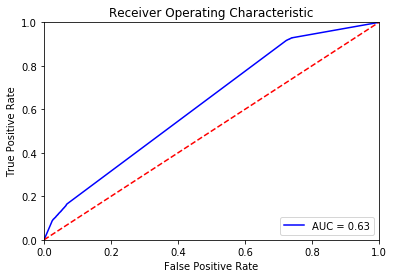

In [56]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,KNN_model_tfidf,5,True)

**Training WF Feature**

In [57]:
KNN_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'KNN')

Best hyperparameters:
 {'n_neighbors': 8, 'weights': 'distance'}
Best score:
 0.6519371817182146


The accuracy of the model on train dataset is 65.40511%
The accuracy of the model on test dataset is 65.85044%
Test result report:

               precision    recall  f1-score   support

           0       0.65      0.85      0.73     22257
           1       0.69      0.42      0.52     17887

    accuracy                           0.66     40144
   macro avg       0.67      0.63      0.63     40144
weighted avg       0.67      0.66      0.64     40144
 

ROC plot and corresponding AUC:



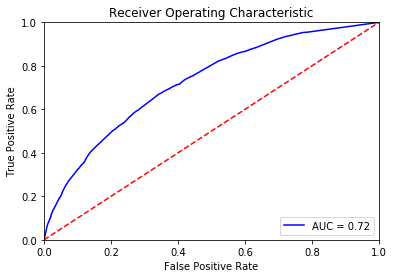

In [58]:
Train_Test_model(WF_x_train,WF_y_train.sentiment.ravel(),WF_x_test,WF_y_test.sentiment.ravel(),KNN_model_wf,5,True)

### 4.1.4 Naive Bayes Model 

**Training TF-IDF Feature**

In [86]:
NaiveBayes_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'NaiveBayes')

Best hyperparameters:
 {'alpha': 0.398}
Best score:
 0.7388087586876915


The accuracy of the model on train dataset is 74.22785%
The accuracy of the model on test dataset is 74.04593%
Test result report:

               precision    recall  f1-score   support

           0       0.73      0.85      0.78     22257
           1       0.76      0.61      0.68     17887

    accuracy                           0.74     40144
   macro avg       0.75      0.73      0.73     40144
weighted avg       0.74      0.74      0.74     40144
 

ROC plot and corresponding AUC:



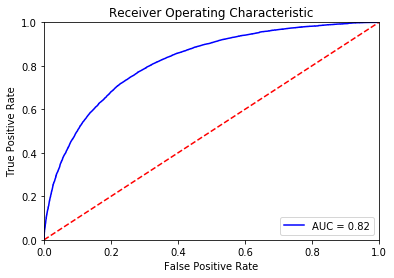

In [87]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,NaiveBayes_model_tfidf,5,True)

**Training WF Feature**

In [72]:
NaiveBayes_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'NaiveBayes')

Best hyperparameters:
 {'alpha': 1.6}
Best score:
 0.7536378874096533


The accuracy of the model on train dataset is 75.69048%
The accuracy of the model on test dataset is 75.54803%
Test result report:

               precision    recall  f1-score   support

           0       0.75      0.83      0.79     22257
           1       0.76      0.67      0.71     17887

    accuracy                           0.76     40144
   macro avg       0.76      0.75      0.75     40144
weighted avg       0.76      0.76      0.75     40144
 

ROC plot and corresponding AUC:



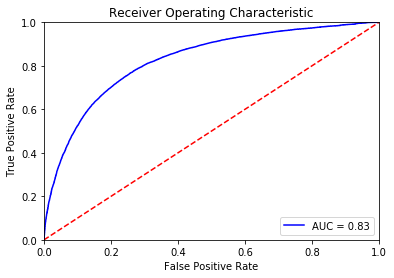

In [73]:
Train_Test_model(WF_x_train,WF_y_train.sentiment.ravel(),WF_x_test,WF_y_test.sentiment.ravel()\
                 ,NaiveBayes_model_wf,5,True)

### 4.1.5 Decision Tree Model 

**Training TF-IDF Feature**

In [76]:
DecisionTree_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'DecisionTree')

Best hyperparameters:
 {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
Best score:
 0.6720723413795681


The accuracy of the model on train dataset is 66.96062%
The accuracy of the model on test dataset is 67.38491%
Test result report:

               precision    recall  f1-score   support

           0       0.70      0.71      0.71     22257
           1       0.64      0.63      0.63     17887

    accuracy                           0.67     40144
   macro avg       0.67      0.67      0.67     40144
weighted avg       0.67      0.67      0.67     40144
 

ROC plot and corresponding AUC:



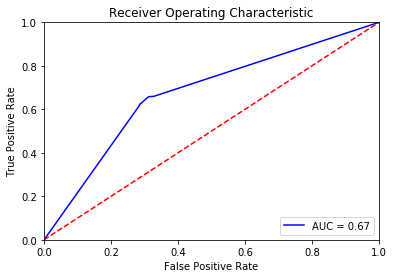

In [77]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,DecisionTree_model_tfidf,5,True)

**Training WF Feature**

In [78]:
DecisionTree_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'DecisionTree')

Best hyperparameters:
 {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
Best score:
 0.673513617389262


The accuracy of the model on train dataset is 67.84033%
The accuracy of the model on test dataset is 67.94291%
Test result report:

               precision    recall  f1-score   support

           0       0.70      0.75      0.72     22257
           1       0.65      0.60      0.62     17887

    accuracy                           0.68     40144
   macro avg       0.68      0.67      0.67     40144
weighted avg       0.68      0.68      0.68     40144
 

ROC plot and corresponding AUC:



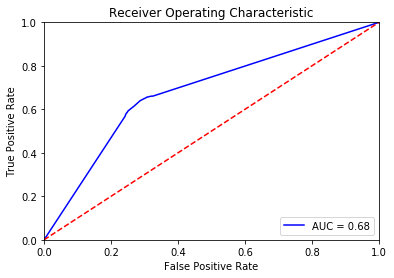

In [79]:
Train_Test_model(WF_x_train,WF_y_train.sentiment.ravel(),WF_x_test,WF_y_test.sentiment.ravel()\
                 ,DecisionTree_model_wf,5,True)

### 4.1.6 RandomForest Model

**Training TF-IDF Feature**

In [262]:
RandomForest_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'RandomForest')

Best hyperparameters:
 {'max_depth': 5, 'n_estimators': 50}
Best score:
 0.5585211440528681


The accuracy of the model on train dataset is 55.84998%
The accuracy of the model on test dataset is 55.44540%
Test result report:

               precision    recall  f1-score   support

           0       0.55      1.00      0.71     22257
           1       1.00      0.00      0.00     17887

    accuracy                           0.55     40144
   macro avg       0.78      0.50      0.36     40144
weighted avg       0.75      0.55      0.40     40144
 

ROC plot and corresponding AUC:



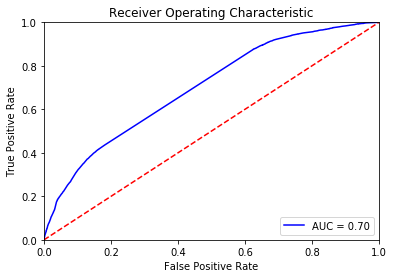

In [263]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,RandomForest_model_tfidf,5,True)

**Training WF Feature**

In [279]:
RandomForest_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'RandomForest')

Best hyperparameters:
 {'max_depth': 5, 'n_estimators': 50}
Best score:
 0.5585424962900488


The accuracy of the model on train dataset is 55.84998%
The accuracy of the model on test dataset is 55.44291%
Test result report:

               precision    recall  f1-score   support

           0       0.55      1.00      0.71     22257
           1       0.00      0.00      0.00     17887

    accuracy                           0.55     40144
   macro avg       0.28      0.50      0.36     40144
weighted avg       0.31      0.55      0.40     40144
 

ROC plot and corresponding AUC:



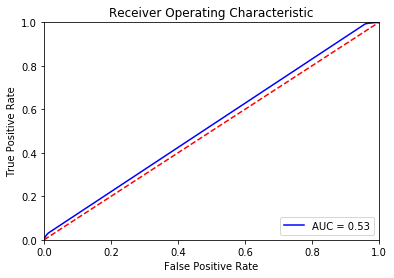

In [280]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,RandomForest_model_wf,5,True)

### 4.1.7 XGBoost Model

**Training TF-IDF Feature**

In [314]:
XG_model_tfidf=GridSearch(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),'XGboost')

Best hyperparameters:
 {'alpha': 0.0, 'booster': 'gbtree'}
Best score:
 0.6783071946363181


The accuracy of the model on train dataset is 67.82752%
The accuracy of the model on test dataset is 67.66391%
Test result report:

               precision    recall  f1-score   support

           0       0.65      0.90      0.75     22257
           1       0.76      0.40      0.53     17887

    accuracy                           0.68     40144
   macro avg       0.70      0.65      0.64     40144
weighted avg       0.70      0.68      0.65     40144
 

ROC plot and corresponding AUC:



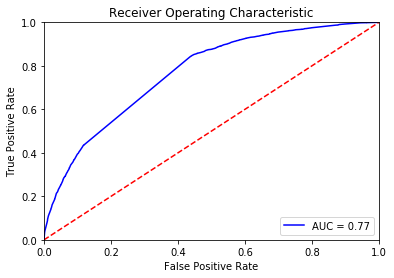

In [315]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,XG_model_tfidf,5,True)

**Training WF Feature**

In [316]:
XG_model_wf=GridSearch(WF_x_train,WF_y_train.sentiment.ravel(),'XGboost')

Best hyperparameters:
 {'alpha': 0.0, 'booster': 'gbtree'}
Best score:
 0.6781790812132341


The accuracy of the model on train dataset is 67.82752%
The accuracy of the model on test dataset is 67.86817%
Test result report:

               precision    recall  f1-score   support

           0       0.65      0.89      0.76     22257
           1       0.76      0.41      0.53     17887

    accuracy                           0.68     40144
   macro avg       0.71      0.65      0.64     40144
weighted avg       0.70      0.68      0.66     40144
 

ROC plot and corresponding AUC:



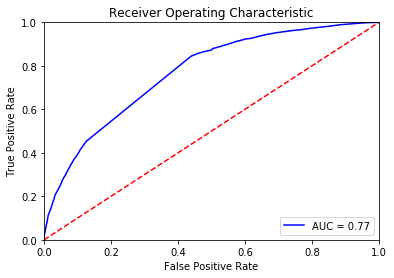

In [317]:
Train_Test_model(TfIdf_x_train,TfIdf_y_train.sentiment.ravel(),TfIdf_x_test,TfIdf_y_test.sentiment.ravel()\
                 ,XG_model_wf,5,True)

### 4.1.8 Comparison of Accuracy of Different Models

The following table demonstrates the accuracy values on test data applied different models. We can see that when we use TF-IDF as feature and apply logistic regression model, we can obtain the highest accuracy value.

| Feature |Logistic Regression | k-NN | Naive Bayes | SVM | Decision Trees | Random Forest | XGBoost |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| TF-IDF | 76.63% | 59.00% | 74.05% | 76.51% | 67.38% | 55.45% | 67.66% |
| WF | 76.41% | 65.85% | 75.55% | 76.03% | 67.94% | 55.44% | 67.86% |

 Therefore, we are going to evaluate logistic regression Model on the 2019 Canadian Elections Data

## Q4 Bonus 

**Deep Learning algorithms**

Reference:https://www.kaggle.com/bertcarremans/using-word-embeddings-for-sentiment-analysis#Introduction

We explored deep learning with Keras on the sentiment data set.However, it has similar performance with the LogisticRegression model. 

In [382]:
from keras import models
from keras import layers
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [394]:
NB_WORDS = 10000 # Parameter indicating the number of words we'll put in the dictionary
MAX_LEN = 26  # Maximum number of words in a sequence
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings

In [414]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history

def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()
    
def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

In [396]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_X.text, sentiment_Y, test_size=0.3, random_state=101)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 93667
# Test data samples: 40144


Converting words to numbers

In [397]:
tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

Creating word sequences of equal length

In [398]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    93667.000000
mean         7.976811
std          3.967971
min          1.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         26.000000
Name: text, dtype: float64

Based on the figures above we will set MAX_LEN to 26. So this means we will not be truncating any words, only pad with zeros. This is to avoid to lose information as the tweets are rather short.

In [399]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [400]:
X_train_seq_trunc[10]  # Example of padded sequence

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  50,  59,  92, 457, 162],
      dtype=int32)

In [401]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

Splitting off validation data

In [402]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (9367, 26)


Keras provides an Embedding layer which helps us to train specific word embeddings based on our training data. It will convert the words in our vocabulary to multi-dimensional vectors.

In [421]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(2, activation='softmax'))
emb_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 26, 8)             80000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 208)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 418       
Total params: 80,418
Trainable params: 80,418
Non-trainable params: 0
_________________________________________________________________


In [422]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

Train on 84300 samples, validate on 9367 samples
Epoch 1/20
84300/84300 [==============================] - 0s 4us/step - loss: 0.6501 - accuracy: 0.6245 - val_loss: 0.5930 - val_accuracy: 0.7289
Epoch 2/20
84300/84300 [==============================] - 0s 3us/step - loss: 0.5379 - accuracy: 0.7554 - val_loss: 0.5139 - val_accuracy: 0.7479
Epoch 3/20
84300/84300 [==============================] - 0s 3us/step - loss: 0.4799 - accuracy: 0.7772 - val_loss: 0.4898 - val_accuracy: 0.7633
Epoch 4/20
84300/84300 [==============================] - 0s 3us/step - loss: 0.4569 - accuracy: 0.7883 - val_loss: 0.4837 - val_accuracy: 0.7682
Epoch 5/20
84300/84300 [==============================] - 0s 3us/step - loss: 0.4434 - accuracy: 0.7961 - val_loss: 0.4837 - val_accuracy: 0.7660
Epoch 6/20
84300/84300 [==============================] - 0s 3us/step - loss: 0.4334 - accuracy: 0.8020 - val_loss: 0.4823 - val_accuracy: 0.7698
Epoch 7/20
84300/84300 [==============================] - 0s 3us/step - los

By comparing the training and validation accuracy and loss, we see that the model starts overfitting from epoch 3.

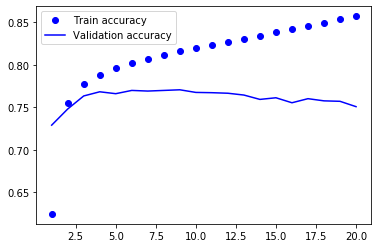

In [423]:
eval_metric(emb_history, 'accuracy')

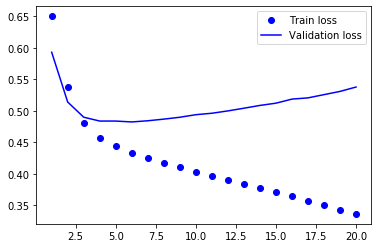

In [424]:
eval_metric(emb_history, 'loss')

In [425]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

40144/40144 [==============================] - 0s 9us/step
/n
Test accuracy of word embeddings model: 74.24%


This test result is quite ok, but still not better than the LogisticRegression.

## 4.2 Sentiment Prediction on Canadian Elections Data

### 4.2.1 Evaluate Logistic Regression Model on the 2019 Canadian Elections Data

In [117]:
CaElection_X=canadian_elections.loc[:,['cleaned']]
CaElection_X.columns=['text']
CaElection_X=pd.DataFrame(CaElection_X.text.apply(lambda x:" ".join(x)))
CaElection_X_tfidf=vectorizer_tfidf.transform(CaElection_X.text)

CaElection_Y = canadian_elections.loc[:,['sentiment']]
CaElection_Y.sentiment=CaElection_Y.sentiment.apply(lambda x: 1 if x =='Positive' else 0 )

The accuracy of the model on the 2019 Canadian Elections Dataset is 58.46226%
Test result report:

               precision    recall  f1-score   support

           0       0.55      0.71      0.62      1006
           1       0.65      0.47      0.55      1127

    accuracy                           0.58      2133
   macro avg       0.60      0.59      0.58      2133
weighted avg       0.60      0.58      0.58      2133
 

ROC plot and corresponding AUC:



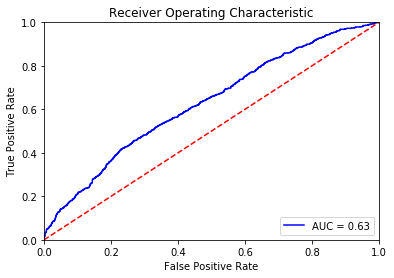

In [119]:
CaElection_prediction =LogisticRegression_model_tfidf.predict(CaElection_X_tfidf)
score_valid_error = accuracy_score(CaElection_Y, CaElection_prediction)
print('The accuracy of the model on the 2019 Canadian Elections Dataset is {0:.5f}%'.format(score_valid_error*100))
print('Test result report:\n\n', classification_report(CaElection_Y, CaElection_prediction),'\n')
#test result report
if len(set(CaElection_Y.sentiment))==2:
    test_score = LogisticRegression_model_tfidf.predict_proba(CaElection_X_tfidf)
    print('ROC plot and corresponding AUC:\n')
    plot_roc(CaElection_Y,test_score)

We can see that the accuracy value is only 58.46% on the 2019 Canadian Elections Dataset after applying logistic regression model which has best performance on sentiment dataset.

In [129]:
canadian_elections['sentiment_predict']=CaElection_prediction
canadian_elections.head()

,sentiment,negative_reason,text,cleaned,party,sentiment_predict
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","[rosiebarton, instead, suggestion, agree, cana...",Conservative Party,0
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","[allwomanspacewalk, real, n, space, station, n...",Other,0
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","[brantford, going, cost, billion, next, year, ...",Liberal Party,0
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","[canada, canadaelection, canadavotes, n, elxn,...",Other,0
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","[canada, taxpayer, sick, amp, tired, hard, ear...",Liberal Party,0


### 4.2.2 Sentiment Prediction and the True Sentiment for  3 Parties

We are going to choose Liberal Party, Conservative Party and New Democratic Part to analysis, which are three most polpular parties in Canada.

**Sentiment Prediction**

In [149]:
CE_sentiment_pre_table=canadian_elections[canadian_elections.sentiment_predict==0].groupby('party').sentiment.agg(['count'])
CE_sentiment_pre_table.columns=['negative']
CE_sentiment_pre_table2=canadian_elections[canadian_elections.sentiment_predict==1].groupby('party').sentiment.agg(['count'])
CE_sentiment_pre_table2.columns=['positive']
CE_sentiment_pre_table=CE_sentiment_pre_table.join(CE_sentiment_pre_table2).fillna(0)
CE_sentiment_pre_table['%neg']=CE_sentiment_pre_table.apply(lambda x: round(int(x[0])/(int(x[1])+int(x[0])),3)*100,axis=1)
CE_sentiment_pre_table['%pos']=CE_sentiment_pre_table.apply(lambda x: round(int(x[1])/(int(x[1])+int(x[0])),3)*100,axis=1)
CE_sentiment_pre_table['total']=CE_sentiment_pre_table.apply(lambda x: (int(x[1])+int(x[0])),axis=1)
CE_sentiment_pre_table=CE_sentiment_pre_table.sort_values(by=['total'], ascending=False)
CE_sentiment_pre_table2=None
CE_sentiment_pre_table=CE_sentiment_pre_table.loc[['Liberal Party','Conservative Party','New Democratic Party']] 

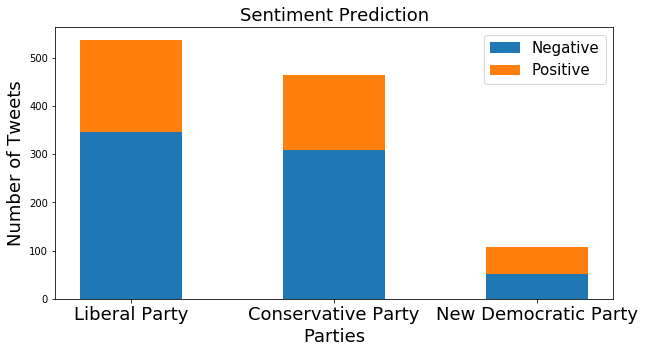

In [164]:
labels_pre = list(CE_sentiment_pre_table.index.values)

neg_pre = (list(CE_sentiment_pre_table.negative.values))
pos_pre = (list(CE_sentiment_pre_table.positive.values))
ind_pre = np.arange(len(labels_pre))   
width = 0.5     

plt.figure(figsize=(10, 5))
p1_pre = plt.bar(ind_pre, neg_pre, width)
p2_pre = plt.bar(ind_pre, pos_pre, width, bottom=neg_pre)


plt.ylabel('Number of Tweets',fontsize=18)
plt.xlabel('Parties',fontsize=18)
plt.title('Sentiment Prediction', fontsize=18)
plt.xticks(ind_pre, labels_pre,fontsize=18)
plt.xticks(rotation=0)
plt.legend((p1_pre[0], p2_pre[0]), ('Negative', 'Positive'),fontsize=15)

plt.show()

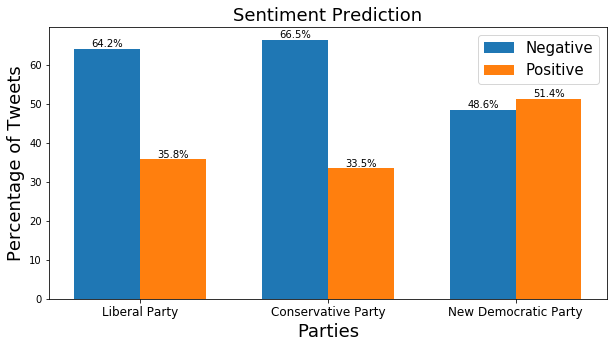

In [182]:
labels_pre = list(CE_sentiment_pre_table.index.values)

neg_pre = (list(CE_sentiment_pre_table['%neg'].values))
pos_pre = (list(CE_sentiment_pre_table['%pos'].values))
ind_pre = np.arange(len(labels_pre))   
width = 0.35     

plt.figure(figsize=(10, 5))
p1_pre = plt.bar(ind_pre-width/2, neg_pre, width)
p2_pre = plt.bar(ind_pre+width/2, pos_pre, width)


plt.ylabel('Percentage of Tweets',fontsize=18)
plt.xlabel('Parties',fontsize=18)
plt.title('Sentiment Prediction', fontsize=18)
plt.xticks(ind_pre, labels_pre,fontsize=12)
plt.xticks(rotation=0)
plt.legend((p1_pre[0], p2_pre[0]), ('Negative', 'Positive'),fontsize=15)

def label(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '{0:0.1f}%'.format(height),
                ha='center', va='bottom')

label(p1_pre)
label(p2_pre)

plt.show()

**True Sentiment**

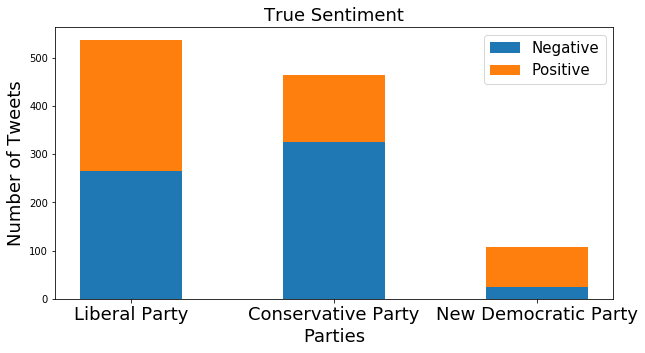

In [184]:
CE_sentiment_table=CE_sentiment_table.loc[['Liberal Party','Conservative Party','New Democratic Party']] 
labels = list(CE_sentiment_table.index.values)

neg = (list(CE_sentiment_table.negative.values))
pos = (list(CE_sentiment_table.positive.values))
ind = np.arange(len(labels))   
width = 0.5     

plt.figure(figsize=(10, 5))
p1 = plt.bar(ind, neg, width)
p2 = plt.bar(ind, pos, width, bottom=neg)

plt.ylabel('Number of Tweets',fontsize=18)
plt.xlabel('Parties',fontsize=18)
plt.title('True Sentiment', fontsize=18)
plt.xticks(ind, labels,fontsize=18)
plt.xticks(rotation=0)
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'),fontsize=15)

plt.show()

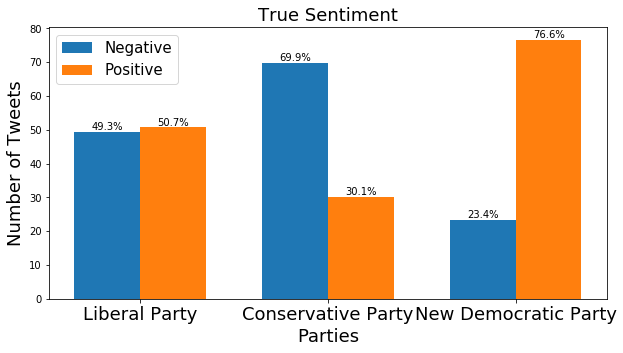

In [188]:
labels = list(CE_sentiment_table.index.values)

neg = (list(CE_sentiment_table['%neg'].values))
pos = (list(CE_sentiment_table['%pos'].values))
ind = np.arange(len(labels))   
width = 0.35     

plt.figure(figsize=(10, 5))
p1 = plt.bar(ind-width/2, neg, width)
p2 = plt.bar(ind+width/2, pos, width)

plt.ylabel('Number of Tweets',fontsize=18)
plt.xlabel('Parties',fontsize=18)
plt.title('True Sentiment', fontsize=18)
plt.xticks(ind, labels,fontsize=18)
plt.xticks(rotation=0)
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'),fontsize=15)


def label(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '{0:0.1f}%'.format(height),
                ha='center', va='bottom')

label(p1)
label(p2)

plt.show()

## 4.3 Predict the Reason for Negative Tweets

In [176]:
CA_X=CA_elections_neg.loc[:,['cleaned']]
CA_X.columns=['text']
CA_X=pd.DataFrame(CA_X.text.apply(lambda x:" ".join(x)))

CA_Y = CA_elections_neg.loc[:,['negative_reason']]
CA_Y.columns=['reason']
#CA_Y.sentiment=sentiment_Y.sentiment.apply(lambda x: 1 if x =='Positive' else 0 )

### 4.3.2 Encode Negative reasons

We combine 'scandal' reason, 'tell lies' reason and 'privilege' reason into one category, since these reasons are negative aspect of a party and the rest of reasons are related with policy of the party. We also combine 'Healthcare' and 'Healthcare and Marijuana' reasons together, because the two reasons are about Healthcare.

In [177]:
reason_encode = {   
    'Women Reproductive right and Racism': 0,
    'Economy': 1,
    'Scandal': 2, 
    'Tell lies': 2,
    'Privilege': 2,
    'Climate Problem': 3, 
    'Healthcare': 4,
    'Healthcare and Marijuana':4,
    'Separation':5,
    'Others':6,
    }

In [178]:
CA_Y['reason']=CA_Y['reason'].map(reason_encode)

### 4.3.3 Train Multi-class Classification Models

**Create WF feature and split data into train data and test data**

In [179]:
vectorizer_wf,wf_X=WF_feature(CA_X.text)

5727


In [180]:
# Split the classified tweet data randomly into training data (70%) and test data (30%). 

seed = 101
CA_WF_x_train, CA_WF_x_test, CA_WF_y_train,\
CA_WF_y_test = train_test_split(wf_X, CA_Y, test_size = 0.30, random_state = seed)


In [181]:
print(CA_WF_x_train.shape)
print(CA_WF_x_test.shape)
print(CA_WF_y_train.shape)
print(CA_WF_y_test.shape)

(704, 5727)
(302, 5727)
(704, 1)
(302, 1)


**Logistic Regression Model**

In [182]:
LG_CA_wf_model=GridSearch(CA_WF_x_train,CA_WF_y_train.reason.ravel(),'LogisticRegression')

Best hyperparameters:
 {'C': 1.5000000000000002, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:
 0.6008522727272727


The accuracy of the model on train dataset is 62.21591%
The accuracy of the model on test dataset is 63.57616%
Test result report:

               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.86      0.40      0.55        15
           2       0.72      0.68      0.70       158
           3       0.89      0.47      0.62        17
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.50      0.68      0.57        94

    accuracy                           0.64       302
   macro avg       0.67      0.42      0.48       302
weighted avg       0.67      0.64      0.63       302
 



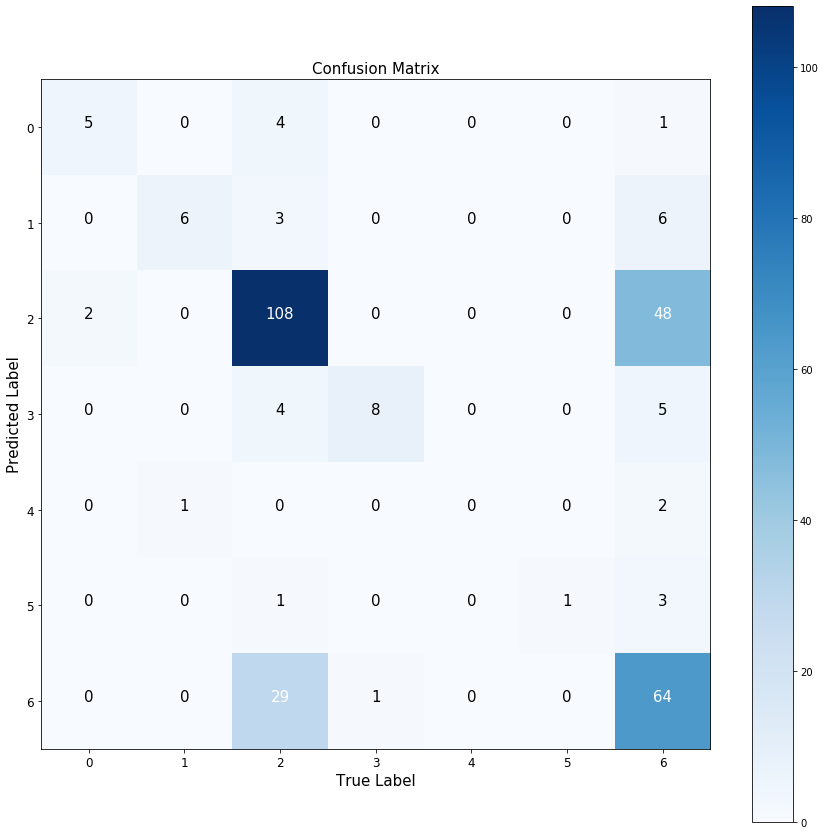

In [339]:
Train_Test_model(CA_WF_x_train,CA_WF_y_train.reason.ravel(),CA_WF_x_test,CA_WF_y_test.reason.ravel(),\
                 LG_CA_wf_model,5,True)

**Naive Bayes Model**

In [73]:
NB_CA_model_wf=GridSearch(CA_WF_x_train,CA_WF_y_train.reason.ravel(),'NaiveBayes')

Best hyperparameters:
 {'alpha': 0.59}
Best score:
 0.5696022727272727


The accuracy of the model on train dataset is 58.23864%
The accuracy of the model on test dataset is 57.94702%
Test result report:

               precision    recall  f1-score   support

           0       0.33      0.10      0.15        10
           1       0.22      0.13      0.17        15
           2       0.67      0.73      0.70       158
           3       0.83      0.29      0.43        17
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.46      0.54      0.50        94

    accuracy                           0.58       302
   macro avg       0.50      0.29      0.33       302
weighted avg       0.58      0.58      0.56       302
 



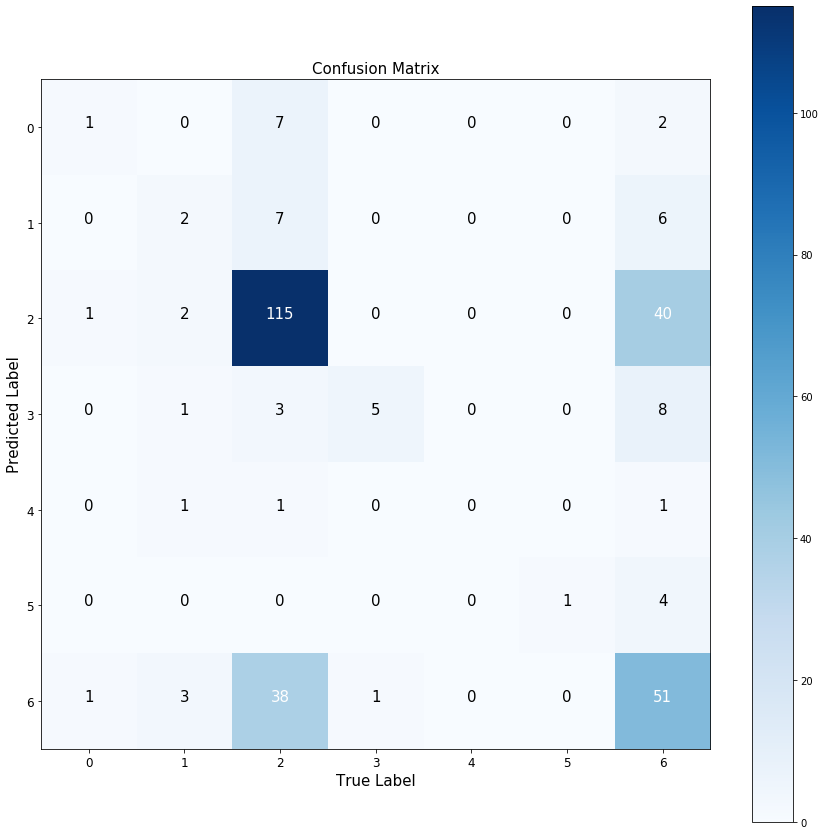

In [74]:
Train_Test_model(CA_WF_x_train,CA_WF_y_train.reason.ravel(),CA_WF_x_test,CA_WF_y_test.reason.ravel(),\
                 NB_CA_model_wf,5,True)

**SVM Model**

In [263]:
SVM_CA_wf_model=GridSearch(CA_WF_x_train,CA_WF_y_train.reason.ravel(),'LinearSVC')

Best hyperparameters:
 {'C': 0.4, 'loss': 'hinge', 'penalty': 'l2'}
Best score:
 0.6065340909090909


The accuracy of the model on train dataset is 60.08523%
The accuracy of the model on test dataset is 62.25166%
Test result report:

               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       1.00      0.47      0.64        15
           2       0.70      0.66      0.68       158
           3       1.00      0.47      0.64        17
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.48      0.67      0.56        94

    accuracy                           0.62       302
   macro avg       0.71      0.41      0.48       302
weighted avg       0.67      0.62      0.62       302
 



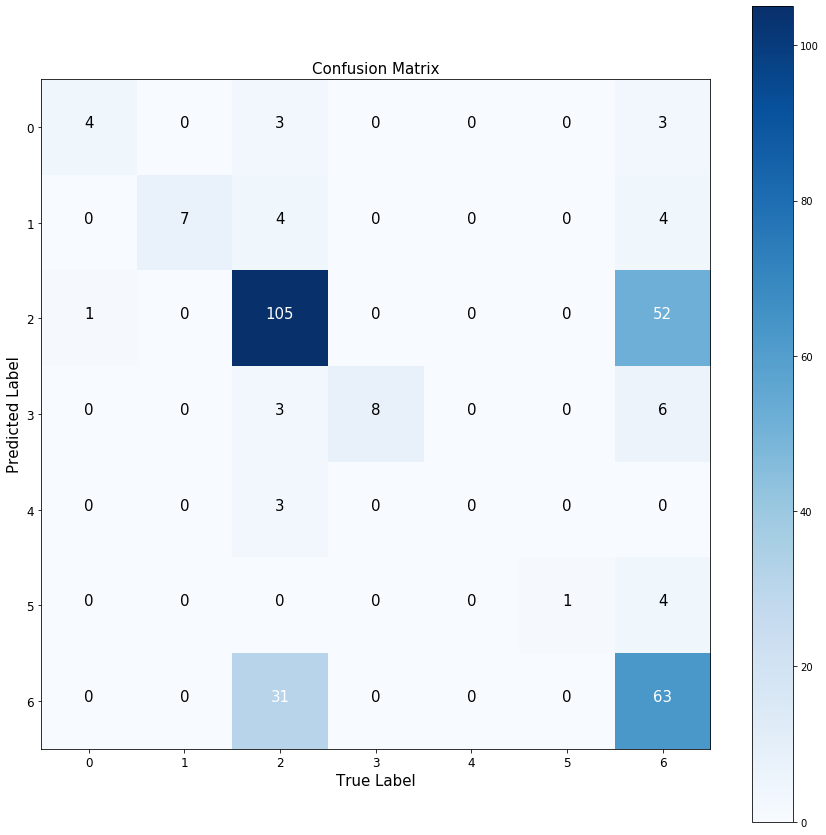

In [264]:
Train_Test_model(CA_WF_x_train,CA_WF_y_train.reason.ravel(),CA_WF_x_test,CA_WF_y_test.reason.ravel(),\
                 SVM_CA_wf_model,5,True)

# 4. Results (20 marks):

Answer the research question stated above based on the outputs of your first model. Describe the results of the analysis and discuss your interpretation of the results. Explain how each party is viewed in the public eye based on the sentiment value. For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets. For both models, suggest one way you can improve the accuracy of your models.

## 4.1 Analysis on the First Model

**From four figures in section 4.2.2, we can see that there were 539 tweets, 395 tweets and 111 tweets related with liberal party, conservative party and new democratic party respectively.**  

**Based on predicted sentiment analysis, 64.2% tweets were negative and 35.8% tweets were positive for liberal party. Conservative party had a similar sentiment proportion that 66.5% tweets were negative and 33.5% were positive. There was a balanced distribution for new democratic party that 48.6% tweets were negative and the rest of tweets were positive.**   

**However, the true sentiment analysis shows a different situation on liberal party and new democratic party. For liberal party, the proportion of negative tweets and positive tweets is almost balanced which was 49.3% and 50.7% respectivly. For new democratic party, the percentage of positive tweets(76.6%) was much higher than the percentage of negative tweets(23.4%). But conservative party had a similar distribution as mentioned above.**  

**Although the accuracy of predicted sentiment is 58.46%, we can get the same conclusion from predicted sentiment and true sentiment analysis that conservative party and iberal party are two most prevailing parties in 2019 Canadian Elections. But it seems likely that more people support liberal party, because there are more people expressed negative sentiments to consercative party than liberal party.**  

**From <a href=https://en.wikipedia.org/wiki/Results_of_the_2019_Canadian_federal_election>results of 2019 Canadian elections</a>, the percentage of seat total for liberal party, conservative party and new democratic party were 46.45%, 35.80% and 7.10%. The election results are similar with our sentiment analysis. Therefore, we can conclude that NLP analytics based on tweets is useful for political parties during election campaigns.**


## 4.2 Analysis on the Second Model

### 4.2.1 Why Logistic Regression Model Fails to Predict The Correct Negative Reasons

From test result report in Logistic Regression Model, we can see that the logistic regression model does not have strong ability to classify the following reasons, including 'Healthcare','Separation' and 'Others'. 

The accuracy of classifying negative reason of 'Healthcare' is 0. We print all tweets which negative reason is about Healthcare and Separation. We can see that there are only 9 sample about healthcare and 16 sample about separation and the content of each tweet contains many meaningless characters or words. So lack of sufficient data and incomplete text cleaning are the main reasons.

In [173]:
Reason_Healthcare=canadian_elections.iloc[CA_Y.loc[CA_Y['reason']==4].index,:].cleaned
Reason_Healthcare=pd.DataFrame(Reason_Healthcare.apply(lambda x:" ".join(x)))
for i in range(len(Reason_Healthcare.cleaned)):
    print("The Tweet with healthcare reason: "+str(i))
    print(Reason_Healthcare.cleaned.iloc[i])

The Tweet with healthcare reason: 0
cbconthecoast coalition gov might get evidence based policy opioid crisis killed canadian since must stop harm stop inter generational trauma elxn cdnpoli stoptheharm safesupply decriminalize voteforchange http co dhp smmeof
The Tweet with healthcare reason: 1
healthcare life support yet absent election time hold federal party leader accountable elxn cndpoli healthcare nhttps co zgaw exy http co zeyjb toip
The Tweet with healthcare reason: 2
thejagmeetsingh next prime minister canada ndentalcare bad pay pay foreign profit oil amp gas npharmacare really bad good medicine supposed cost health polcan elxn
The Tweet with healthcare reason: 3
rokoshme anything govt grant xe gonna apply test people snack legal illegal weed snack choice vary good mill liberal wait xe gone monday night finger crossed xf xa xf xbc vote elxn
The Tweet with healthcare reason: 4
every province forced sell trudeau weed losing money nevery weed company losing money ntrudeau xe eve

In [174]:
Reason_Separation=canadian_elections.iloc[CA_Y.loc[CA_Y['reason']==5].index,:].cleaned
Reason_Separation=pd.DataFrame(Reason_Separation.apply(lambda x:" ".join(x)))
for i in range(len(Reason_Separation.cleaned)):
    print("The Tweet with healthcare reason: "+str(i))
    print(Reason_Separation.cleaned.iloc[i])

The Tweet with healthcare reason: 0
sheilagunnreid honestly let qu xc xa bec separate let western canada separate let rest figure put end always failed experiment known canada ever unified elxn cdnpoli
The Tweet with healthcare reason: 1
andrew scheer justin trudeau sowed seed division amp hate country amp fit lead nreporter paid kinsella sow seed division amp hate nscheer would like plead th oh shit canada decline answer elxn cdnpoli
The Tweet with healthcare reason: 2
elxn get closer find wondering became divided remember disliking chretien martin dion ignatieff quite liked layton amp mulcair amp remember broadbent particularly unlikeable ni old amp cynical something wrong canada
The Tweet with healthcare reason: 3
challenging time justin trudeau watch bloc risen ash talk separation air alberta cdnpoli elxn ableg
The Tweet with healthcare reason: 4
vote may actively work break country good look canadian conservative elxn cdnpoli http co ghamyntvgl
The Tweet with healthcare reason: 5


### 4.2.2 How to improve the accuracy of models

In [78]:
from sklearn.model_selection import learning_curve
def get_learning_curve_plot(estimator,X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy'):
    #this function returns the learning plot of the model
    plt.figure(figsize=(10,6))
    #get learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fill the range of the score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    #plot the score trend
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="The learning curve for the training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="The learning curve for the cross-validation set")
    plt.legend(loc="best")
    plt.grid()
    plt.ylim(0,1)
    plt.title('Model')
    plt.xlabel("# of training data")
    plt.ylabel('Accuracy Score')
    return plt

**Logistic Regression Model**

For Logistic Regression Model, we can tune hyperparameters C and gama, but the model will overfit if the C and gama is so huge.

In [188]:
from math import log
steps_c=np.array([0.001,0.01,0.05,0.1,0.5,1,1.5,2,5,7,8,9,10,50,100,200,500,1000,1500,2000,2500,3000,4500,5000,5500,10000])

def tunec(X_train, Y_train,X_test,Y_test,steps_c):
    trainErrC = np.zeros(steps_c.shape)
    testErrC = np.zeros(steps_c.shape)
    for i, step in enumerate(steps_c):
        # Train model
        model_c_tune=LogisticRegression(solver='liblinear', C=step, multi_class='auto',penalty="l1",dual=False)
        model_c_tune.fit(X_train, Y_train)
    
        # Make Predictions
        y_train_pred = model_c_tune.predict(X_train)
        y_test_pred = model_c_tune.predict(X_test)
    
        y_train_pred=y_train_pred.reshape(-1,1)
        y_test_pred=y_test_pred.reshape(-1,1)
    
        # Calculate Error
        #ACC_train=accuracy_score(y_test_sp, predictions)
        
        ACC_train=accuracy_score(Y_train, y_train_pred)
        ACC_test=accuracy_score(Y_test, y_test_pred)
        
        trainErrC[i] = ACC_train
        testErrC[i] =  ACC_test

    
    print("finish")
    plt.figure(figsize=(12,5))
    plt.plot(np.log(steps_c),trainErrC,'r',label='Training Set')
    plt.plot(np.log(steps_c),testErrC,'g',label='Test Set')


    plt.title("C Tuning")
    plt.xlabel("Log(C)")
    plt.ylabel("Accuracy score")
    plt.legend(loc=1)


finish


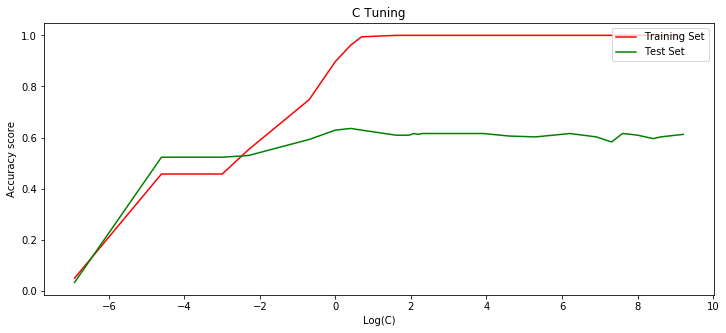

In [189]:
tunec(CA_WF_x_train,CA_WF_y_train.reason.ravel(),CA_WF_x_test,CA_WF_y_test.reason.ravel(),steps_c)

**Naive Bayes Model**

For Naive Bayes Model, we can improve the performance by applying some sort of classifier combination technique (eg, ensembling, boosting, bagging) or replacing synonyms with same term in data parsing.

**SVM Model**

For SVM model, we can improve the performance by using different kernal like "rbf".